In [141]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time  

train_data=pd.read_excel("C:/Users/risha/Downloads/q1train.xlsx")
test_data=pd.read_excel("C:/Users/risha/Downloads/q1test.xlsx")

train_data.head() 

,Aptitude,Verbal,Label
0,34.723660,30.386711,0
1,30.386711,35.947409,0
2,35.947409,60.282599,0
3,45.183277,61.206665,0
4,95.961555,75.113658,0


In [180]:
d=train_data.to_numpy()
X=d[:,0:2]
Y=d[:,-1]

In [177]:
#Normalizing Dataset
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [181]:
a=np.ones(X.shape[0])
a=np.expand_dims(a, axis=1)
X=np.append(a, X, axis=1)

In [144]:
#Target Encoding
te=np.empty((Y.shape[0],1))
for i in range(Y.shape[0]):
    if(Y[i]==0):
        te[i]=-1
    else:
        te[i]=1

In [145]:
#Signum Function
def signum(x):
    if x>=0:
        return 1
    else: 
        return -1

In [161]:
alpha = 0.001 
m = te.size 
weights = np.array([np.random.random(1)[0],np.random.random(1)[0],np.random.random(1)[0]])
final_weights=np.empty((3,1))
epochs=10000
tot_cost=[]
loss=[]
prev_cost=np.inf
for i in range(epochs):
    for j in range(m):
        pred=X[j,:].dot(weights)
        y_pred=signum(pred)
        cc=pred*te[j]
        if(cc<0):
            weights=weights+alpha*X[j,:]*te[j]
            loss=-X[j,:].dot(weights)*te[j]
    loss_np=np.array(loss)
    cost=np.sum(loss_np)
    if(cost<prev_cost):
        final_weights=weights
    tot_cost.append(cost)
    prev_cost=cost

In [162]:
weights

array([-5.64162927,  0.17295387, -0.02708792])

In [163]:
final_weights

array([-5.64162927,  0.17295387, -0.02708792])

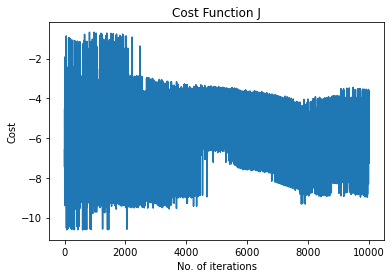

In [164]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(tot_cost)
plt.show()

In [165]:
ypred=[]
for i in range(X.shape[0]):
    ypred.append(signum(X[i,:].dot(final_weights)))

In [166]:
#Training Accuracy
ct = 0    
correctly_classified=0
for ct in range(np.size(ypred)):  
    if (te[ct] == ypred[ct]) :            
        correctly_classified = correctly_classified + 1       
          
print( "Accuracy on training set:", ( correctly_classified / ct ) * 100,"%")

Accuracy on training set: 71.01449275362319 %


In [167]:
ypred=np.array(ypred)

In [168]:
ypred.T

array([-1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1])

In [169]:
ypred=np.expand_dims(ypred,axis=1)

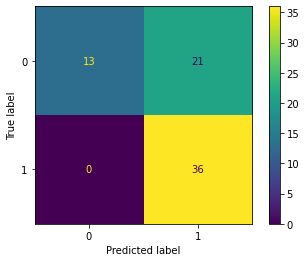

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(te, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [171]:
#Prediction on test data
test_data= pd.read_excel("CLL788_A1/q2test.xlsx")
print(test_data.head()) 
test_data.insert(loc=0, column='intercept', value=1.0)
d=test_data.to_numpy()
X_test=d[:,0:3]

    Aptitude     Verbal
0  32.822833  43.407173
1  64.139320  78.131688
2  72.446494  96.327593
3  60.557886  73.194998
4  58.940956  75.958448


In [172]:
ypred_test=[]
for i in range(X_test.shape[0]):
    ypred_test.append(signum(X_test[i,:].dot(final_weights)))
ypred_test=np.array(ypred_test) 
# print(ypred_test)
ypred_test = np.where(ypred_test > 0, 1, 0) 

In [173]:
ypred_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

In [174]:
np.savetxt('perceptron_test.txt', ypred_test, fmt ='%.0f\n')

In [182]:
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,5))
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.grid(True)
    plt.title("Decision Boundary for Perceptron ")

    for input,target in zip(X[:,1:3],Y):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,1:3]),np.amax(inputs[:,1:3])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
#         print(i)
        plt.plot(i, y,'ko')

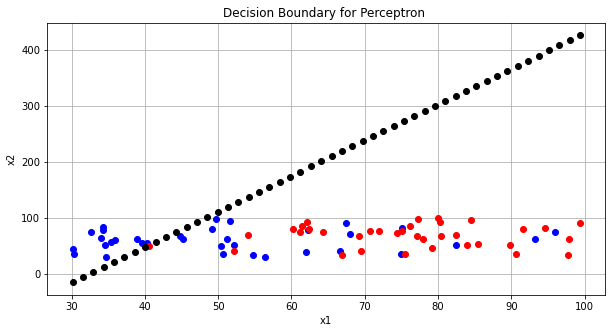

In [183]:
plot_data(X,Y,final_weights)